### <h1 style="font-size:40px;"><center>Exercise I:<br> Multi-layer perceptrons
for classification and regression problems.
</center></h1>


## Short summary
In this exercise you will: 

* train MLPs and for both classification and regression problems
* overfit models and see how overfitting changes validation performance
* avoid overfitting using regularization
* do model selection

There are 11 questions in this exercise. These 11 questions can be found in five different cells below (see section "The Different Cells"). All of the exercises deal with training and evaluation of the multi-layer perceptron (MLP) network. You are going to work with different datasets, binary and multiple classification problems and function approximation problems. For all questions, except the last two ones, code is available that you can run directly or only need to make small modifications to. For the last two questions we only provide a small part of the code and you should provide the rest. However, it is typically just a matter of paste and copy from the previous code cells (in a proper way).

You will write the report of the exercise within this notebook. The details of how to do that can be found below in section "Writing the report". Finally before you start:


## The data
There are several datasets in this exercise. 

### syn1 - syn3
Three different synthetic classification problems will be used. They are all 2D binary classification problems which allows for an easy visual inspection of the different classes and the decision boundary implemented by the network. They are called *syn1, syn2* and *syn3*. Each of these datasets are generated "on the fly" each time. They come from various normal distributions. Since they are generated using random numbers it means that each time you generate the data it will be slightly different from next time. You can control this by having a fixed *seed* to the random number generator. The cell "PlotData" will plot these datasets.

### regr1
There is also a synthetic regression problem, called *regr1*. It has 6 inputs (independent variables) and one output variable (dependent variable). It is generated according to the following formula:  

$\qquad d = 2x_1 + x_2x_3^2 + e^{x_4} + 5x_5x_6 + 3\sin(2\pi x_6) + \alpha\epsilon$  
    
where $\epsilon$ is added normally distributed noise and $\alpha$ is a parameter controlling the size of the added noise. Variables $x_1,...,x_4$ are normally distrubuted with zero mean and unit variance, whereas $x_5, x_6$ are uniformly distributed ($[0,1]$). The target value $d$ has a non-linear dependence on ***x***.

### Spiral data
This is the "famous" spiral dataset that consists of two 2-D spirals, one for each class. The perfect classification boundary is also a spiral. The cell "PlotData" will plot this dataset.

### Japanese vowels dataset
*This data set is taken from the UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels].* In short, nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, a discrete times series was produced where each time point consists of 12 (LPC cepstrum) coefficients. The length of each time series was between 7-29. 
Here we treat each point of the time series as a feature (12 inputs). In total we have 9961
data points which then has been divided into 4274 for training, 2275 for validation and 3412 for test. The original data files are provided as *ae.train* and *ae.test*. The task is now based on a single sample value of one of the speakers, determine which speaker it was. This is, in summary, a 9-class classification problem with 12 input values for each case.

## The exercises
There are 11 questions, where the first 5 questions are dealing with 2D binary classification problems. Here you will be able to see the boundary implemented by the different MLPs that you train. Questions 6-9 deals with training a regression network for the *regr1* dataset. Here you are also going to use regularization to "combat" overtraining. Question 10 is the Japanese vowels classification problem, here your task is to come up with a model that optimizes the validation result. Finally, the last exercise is to find a model that can solve the spiral problem.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | MLP | Needed | Defines the MLP model |
| 3 | Data | Needed | Defines the functions to generate the artificial datasets |
| 4 | PlotData | Information | Plots the 2D classification datasets |
| 5 | Statistics | Needed | Defines the functions that calculates various performance measures |
| 6 | Boundary | Needed | Function that can show 2D classification boundaries | 
| 7 | Confusion | Needed | Function that plots the confusion matrix | 
| 8 | Ex1 | Exercise | For question 1 |
| 9 | Ex2 | Exercise | For question 2-5 |
| 10 | Ex3 | Exercise | For question 6-9 |
| 11 | Ex4 | Exercise | For question 10 |
| 12 | Ex5 | Exercise | For question 11 |

In order for you to start with the exercise you need to run all cells with the celltype "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.


## Last but not least
Have fun!

---

### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries

In the cell below, we import all the libraries that are needed for this exercises. There are two configuration parameters that you can change in this cell

* The size of the plots
* Inline or "pop out" plots.

See comments in the cell for more information. Default is inline plots with a "lagom" size. Run the cell by entering into the cell and press "CTRL Enter".

In [1]:
import os
os.environ['KERAS_BACKEND']='tensorflow'

import numpy as np
import scipy as sp
import tensorflow as tf
import random as rn

import keras
from keras import backend as K
from keras.layers import Dense, Input
from keras.models import Model
from keras import metrics, regularizers

from sklearn.metrics import *

import matplotlib.pyplot as plt
import matplotlib as mpl


# The size of the plots.
mpl.rcParams['figure.figsize'] = (5,5)


# To have the plots inside the notebook "inlin" should be True. 
# If "inlin" = False, then plots will pop out of the notebook
inlin = True # True/False
if inlin:
    %matplotlib inline
else:
    %matplotlib 


### CellName: MLP (#2)
### CellType: Needed
### Cell instruction: Defining the MLP model

This cell defines the MLP model. There are a number of parameters that is needed to 
define a model. Here is a list of them: **Note:** They can all be specified when you call
this function in later cells. The ones specified in this cell are the default values.

* inp_dim: the input dimension (integer)

* n_nod: size of the network, eg [5] for a one hidden layer with 5 nodes and [5,3] for a two layer network with 5 and 3 hidden nodes each.

* act_fun: the activation function. Most common are
    * 'linear'
    * 'relu'
    * 'tanh'
    * 'sigmoid'
        
* out_act_fun: the activation function for the output nodes. Most common are
    * 'linear'
    * 'sigmoid'
    * 'softmax'
    
* opt_method: The error minimization method. Common choices
    * 'SGD'
    * 'Adam'
    * 'Nadam'
    * 'RMSprop'
    
* cost_fun: The error function used during training. There are three common ones
    * 'mean_squared_error'
    * 'binary_crossentropy'
    * 'categorical_crossentropy'

* lr_rate: The learning rate. Note some of the minimization methods uses a dynamical learning rate. In such a cases this value sets the initial learning rate.

* lambd: L2 regularization parameter

* num_out: The number of output nodes

Run the cell by entering into the cell and press "CTRL Enter".

In [2]:
def pipline(inp_dim,
            n_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for nod in n_nod:
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(keras.optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(lr = lr_rate),
                  loss = cost_fun)
                  #metrics=['accuracy', 'mse'])   
    
    return model



### CellName: Data (#3)
### CellType: Needed
### Cell instruction: Defining synthetic data sets

This cell defines the three different synthetic data sets and the regression dataset. It also provides functions for reading the Vowles dataset and the Spiral data. Run the cell by entering into the cell and press "CTRL Enter".

In [3]:
def syn1(N):
    """ data(samples, features)"""
    
    global seed
    
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)
  
    data[:N1,0] = 4 + np.random.normal(loc=.0, scale=1., size=(N1))
    data[N1:,0] = -4 + np.random.normal(loc=.0, scale=1., size=(N-N1))
    data[:,1] = 10*np.random.normal(loc=.0, scale=1., size=(N))
    
    
    data = data / data.std(axis=0)
    
    # Target
    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))
    
    # Rotation
    theta = np.radians(30)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c,-s],[s,c]]) # rotation matrix
    data = np.dot(data,R) 
    
    return data,tar


def syn2(N):
    """ data(samples, features)"""
    
    global seed
     
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)

    # Positive samples
    data[:N1,:] = 0.8 + np.random.normal(loc=.0, scale=1., size=(N1,2))
    # Negative samples 
    data[N1:,:] = -.8 + np.random.normal(loc=.0, scale=1., size=(N-N1,2))
    
    
    # Target
    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))

    return data,tar


def syn3(N):
    """ data(samples, features)"""

    global seed
    
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(2*N/3)
    
    # disk
    teta_d = np.random.uniform(0, 2*np.pi, N1)
    inner, outer = 2, 5
    r2 = np.sqrt(np.random.uniform(inner**2, outer**2, N1))
    data[:N1,0],data[:N1,1] = r2*np.cos(teta_d), r2*np.sin(teta_d)
        
    #circle
    teta_c = np.random.uniform(0, 2*np.pi, N-N1)
    inner, outer = 0, 3
    r2 = np.sqrt(np.random.uniform(inner**2, outer**2, N-N1))
    data[N1:,0],data[N1:,1] = r2*np.cos(teta_c), r2*np.sin(teta_c)
    
    # Normalization
    #data = data - data.mean(axis=0)/data.std(axis=0)

    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))
    
    return data, tar


def regr1(N, v=0):
    """ data(samples, features)"""

    global seed

    data = np.empty(shape=(N,6), dtype = np.float32)  
    
    uni = lambda n : np.random.uniform(0,1,n)
    norm = lambda n : np.random.normal(0,1,n)
    noise =  lambda  n : np.random.normal(0,1,n)
    
    
    for i in range(4):
        data[:,i] = norm(N)
    for j in [4,5]:
        data[:,j] = uni(N)
    
    tar =   2*data[:,0] + data[:,1]* data[:,2]**2 + np.exp(data[:,3]) + \
            5*data[:,4]*data[:,5]  + 3*np.sin(2*np.pi*data[:,5])
    std_signal = np.std(tar)
    tar = tar + v * std_signal * noise(N)
        
    return data, tar

def spiral():
    tmp = np.loadtxt("spiral.dat")
    data, tar = tmp[:, :2], tmp[:, 2]

    return data, tar

def vowels():
    
    def pre_proc(file_name):
        block = []
        x = []
    
        with open(file_name) as file:
            for line in file:    
                if line.strip():
                    numbers = [float(n) for n in line.split()]
                    block.append(numbers)
                else:
                    x.append(block)
                    block = []
                
        ################################
        x = [np.asarray(ar) for ar in x]    
        return x

    x_train = pre_proc('ae.train')
    x_test = pre_proc('ae.test')

    
    ############## LABELS###########
    chunk1 = list(range(30,270, 30))
    y_train = []
    person = 0

    for i, block in enumerate(x_train):
        if i in chunk1:
            person += 1
        y_train.extend([person]*block.shape[0])
        
    chunk2 = [31,35,88,44,29,24,40,50,29]
    chunk2 = np.cumsum(chunk2)
    y_test = []
    person = 0
    for i, block in enumerate(x_test):
        if i in chunk2:
            person += 1
        y_test.extend([person]*block.shape[0])

    x_train = np.vstack(x_train)
    x_test = np.vstack(x_test)
    
    ## Split into train, validation and test
    num_classes = 9
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    from sklearn.model_selection import train_test_split

    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=42)

    return x_train, y_train, x_val, y_val, x_test, y_test
    

### CellName: PlotData (#4)
### CellType: Information
### Cell instruction: Plotting the data

Here we just generate 100 cases for syn1-syn3 and the spiral dataset and plot them. Run the cell by entering into the cell and press "CTRL Enter". 

**Note!** This cell is not needed for the actual exercises, it is just to visualize the four different 2D synthetic classification data sets.

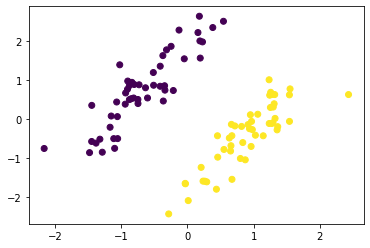

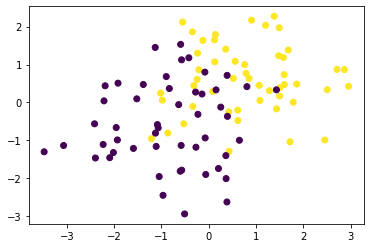

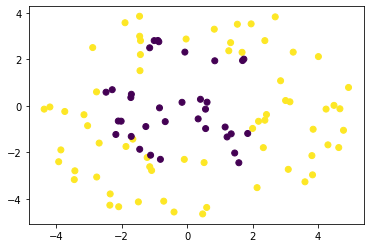

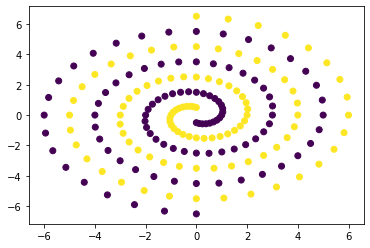

In [4]:
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

d,t = syn1(100)
plt.figure(1)
plt.scatter(d[:,0],d[:,1], c=t)

d,t = syn2(100)
plt.figure(2)
plt.scatter(d[:,0],d[:,1], c=t)

d,t = syn3(100)
plt.figure(3)
plt.scatter(d[:,0],d[:,1], c=t)

d,t = spiral()
plt.figure(4)
plt.scatter(d[:,0],d[:,1], c=t)


### CellName: Statistics (#5)
### CellType: Needed
### Cell instruction: Present result for both classification and regression problems

This cell defines two functions that we are going to call using a trained model to calculate both error and performance measures. Run the cell by entering into the cell and press "CTRL Enter".

In [5]:
def stats_class(x = None, y = None, label = 'Training', modl = None):
    """
    input :  
             x = input
             y = output
             label = "Provided text string"
             modl = the model
             
    output : 
             sensitivity = fraction of correctly classified positive cases
             specificity = fraction of correctly classified negative cases
             accuracy = fraction of correctly classified cases
             loss = typically the cross-entropy error
    """
    
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    sens = tp / nof_p
    spec = tn / nof_n
    acc = (tp + tn) / (len(y))
    loss = modl.evaluate(x, y , batch_size =  x.shape[0], verbose=0)
                
    A = ['Accuracy', 'Sensitivity', 'Specificity', 'Loss']
    B = [acc, sens, spec, loss]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for r in zip(A,B):
         print(*r, sep = '   ')
    return print('\n','#'*50)

def stats_reg(d = None, d_pred = None, label = 'Training', estimat = None):
    
    A = ['MSE', 'CorrCoeff']
    
    pcorr = np.corrcoef(d, d_pred)[1,0]
    
    if label.lower() in ['training', 'trn', 'train']:
        mse = estimat.history['loss'][-1]
    else:
        mse = estimat.history['val_loss'][-1] 

    B = [mse, pcorr]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for r in zip(A,B):
         print(*r, sep = '   ')
    return print('\n','#'*50)



### CellName: Confusion (#6)
### CellType: Needed
### Cell Instruction: Plot the confusion matrix

This cell defines the function that plots the confusion matrix. A confusion matrix is a summary of the predictions made by a classifier. Each column of the matrix represents the instances of the predicted class while each row represents the instances of the actual class. Run the cell by entering into the cell and press "CTRL Enter".

In [6]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### CellName: Boundary (#7)
### CellType: Needed
### Cell Instruction: Decision boundary

This cell defines the function to plot the decision boundary for a 2D input binary MLP classifier. Run the cell by entering into the cell and press "CTRL Enter".

In [7]:
def decision_b(X = None, Y1 = None ):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # grid stepsize
    h = 0.025

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    Z[Z>.5] = 1
    Z[Z<= .5] = 0

    Y_pr = model.predict(X, batch_size = X.shape[0], verbose=0).reshape(Y1.shape)
  
    Y = np.copy(Y1)
    Y_pr[Y_pr>.5] = 1
    Y_pr[Y_pr<= .5] = 0
    Y[(Y!=Y_pr) & (Y==0)] = 2
    Y[(Y!=Y_pr) & (Y==1)] = 3
    
    
    plt.figure()
    #plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha = .9) 
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    
    plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], marker='+', c='k')
    plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], marker='o', c='k')
       
    plt.scatter(X[:, 0][Y==3], X[:, 1][Y==3], marker = '+', c='r')   
    plt.scatter(X[:, 0][Y==2], X[:, 1][Y==2], marker = 'o', c='r')
    
    
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.tight_layout()


---
End of "Needed" and "Information" cells. Below are the cells for the actual exercise.

---

### CellName: Ex1 (#8)
### CellType: Exercise
### Cell instruction: Instruction for question 1

The cell below should be used for question 1. You can run the cell as it is (i.e. CTRL-Return). However, looking at the code will help you understand how the network is created, trained and evaluated. It will be useful for the other questions.

#### Question 1

Use synthetic data 1 (syn1) (100 data points) and train a linear MLP to separate the two classes, i.e. use a single hidden node. **Why can you solve this problem with a single hidden node?**


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________

 ########## STATISTICS for Training Data ########## 

Accuracy   1.0
Sensitivity   1.0
Specificity   1.0
Loss   0.037220850586891174

 ##################################################


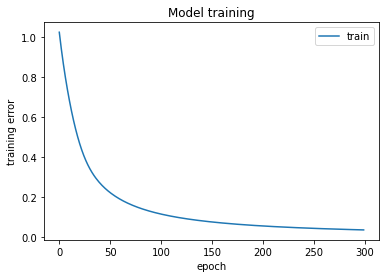

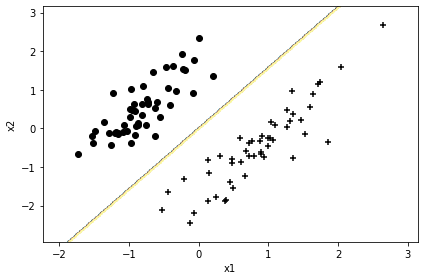

In [8]:
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None
    
# Generate training data
x_train, d_train = syn1(100)

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_train.shape[1],         
         'n_nod': [1],                      # number of nodes in hidden layer
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'SGD',               # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.1,                    # learningrate
         'num_out' : 1 }              # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model = pipline(**INPUT)

# Print a summary of the model
model.summary()

# Train the model
estimator = model.fit(x_train, d_train,
                      epochs = 300,                     # Number of epochs
                      #validation_data=(x_val, y_val),  # We don't have any validation dataset!
                      batch_size = x_train.shape[0],    # Use batch learning
                      #batch_size=25,                   
                      verbose = 0)

# Call the stats function to print out statistics for the training
stats_class(x_train, d_train, 'Training', model)

# Some plotting
plt.plot(estimator.history['loss'])
plt.title('Model training')
plt.ylabel('training error')
plt.xlabel('epoch')
plt.legend(['train'], loc=0)
plt.show()

# Show the decision boundary
decision_b(x_train, d_train)


### CellName: Ex2 (#9)
### CellType: Exercise
### Cell instruction: Instruction for question 2-5

The cell below should be used for questions 2-5. For question 2 you can run the cell as it is (i.e. CTRL-Return). For the other questions you need to modify the cell in order to change data set, vary the size of the network etc. There are brief comments in the code that will guide you here.

From now on we will talk about *performance*! It can be performance of a trained model on the training dataset or the performance on the validation dataset. What do we mean by performance?  For classification problems we will provide 4 different measurements as returned by a call to the *stats_class* function. They are:
* Sensitivity = fraction of correctly classified "1" cases
* Specificity = fraction of correctly classified "0" cases
* Accuracy = fraction of correctly classified cases
* loss = cross-entropy error (so low loss means good performance!)

Our suggestion for you is to either use accuracy or loss as your performance measure.

#### Question 2
Here you are going to train a classifier for the *syn2* dataset. You are also going to use a validation dataset as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation datapoints. 

Now, use synthetic data 2 (syn2)(100 training data points) and train a *linear* MLP to separate the two classes, i.e. use a single hidden node. **What is the performance you get on the validation dataset?** Note: Use a fixed random seed for this exercise since you will compare with runs in the next question.

#### Question 3
You are now going to overtrain the MLP! By increasing the number of hidden nodes we should be able to get better and better training performance. **How many hidden nodes do you need to reach an accuracy >95% on your training dataset?**

**Hint:** Overtraining here often means finding good local minimum of the error function, which may require some tuning of the learning parameters. This means that you may have to change the learning rate, increase the number of epochs and use "better" minimization methods. Even though we have not yet talked about the *Adam* minimization method, it is generally better than vanilla *stochastic gradient descent*. It is therefore used in the cells below as the default minimizer. Also you may want to change the size of the "batch_size" parameter. It is by default using all data.

#### Question 4
The effect of overtraining can be monitored by looking at the validation performance. **(a) When you overtrained in the previous question, how much much did the validation *loss* increase, compared to the linear model of Q2?** **(b) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?** 

#### Question 5
Now you are going to use the *syn3* dataset. So, use **150** training datapoints from the synthetic dataset 3 and train an MLP to separate the two classes. Also use about 1000 datapoints for validation. **How many hidden nodes do you need to find a reasonable solution to the problem?  Extra: Can you figure out why this many?**


Model: "model_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_157 (Dense)            (None, 3)                 9         
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________

 ########## STATISTICS for Training Data ########## 

Accuracy   0.8066666666666666
Sensitivity   0.86
Specificity   0.7
Loss   0.2970675528049469

 ##################################################

 ########## STATISTICS for Validation Data ########## 

Accuracy   0.846
Sensitivity   0.8828828828828829
Specificity   0.7724550898203593
Loss   0.29599690437316895

 ######################

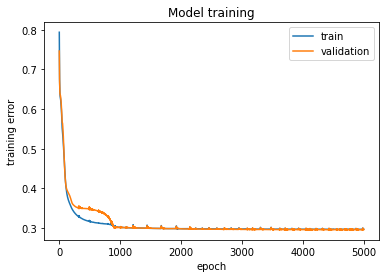

CPU times: user 1min 38s, sys: 4.17 s, total: 1min 43s
Wall time: 1min 27s


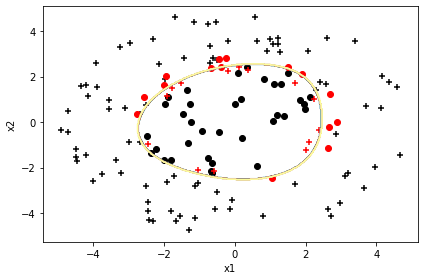

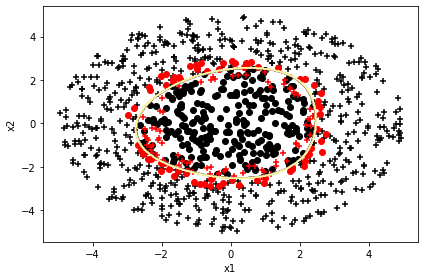

In [96]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None
# Generate training data
x_train, d_train = syn3(150)
x_val, d_val = syn3(1000)
# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_train.shape[1],         
         'n_nod': [3],                      # number of nodes in hidden layer
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',               # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.05 ,                    # learningrate
         'num_out' : 1 }              # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model = pipline(**INPUT)

# Print a summary of the model
model.summary()

# Train the model
estimator = model.fit(x_train, d_train,
                      epochs = 5000,      
                      validation_data=(x_val, d_val),
                      batch_size = x_train.shape[0],    # Batch size = all data (batch learning)
                      #batch_size=75,                   # Batch size for true SGD
                      verbose = 0)

# Call the stats function to print out statistics for classification problems
stats_class(x_train, d_train, 'Training', model)
stats_class(x_val, d_val, 'Validation', model)

# Plot the learning curves
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('Model training')
plt.ylabel('training error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=0)
plt.show()

# Show the decision boundary for the training dataset
decision_b(x_train, d_train)

# If you uncomment this one you will see how the decsion boundary is with respect to the validation data
decision_b(x_val, d_val)


### CellName: Ex3 (#10)
### CellType: Exercise
### Cell instruction: Instruction for question 6-9

Now we are going to look at a regression problem. The data as described above (regr1) consists of 6 inputs (features) and one output (target) value. As for previous examples a new data set is generated each time you call the *regr1* function. To get exactly the same data set between different calls, use a fixed seed. New for this problem is that one can also control the amount of noise added to the target value. We are going to use a relatively small training dataset (~250) and a larger validation dataset (~1000) to get a more robust estimation of the generalization performance. For regression problems we also need new performance measures. The *stats_reg* function will give you two such measures:
* MSE = mean squared error (low error mean good performance)
* CorrCoeff = Pearson correlation coefficient for the scatter plot between predicted and true values.

The cell below can be used as an template for all questions regarding this regression problem.

#### Question 6
Use 250 data points for training and about 1000 for validation and **no** added noise. Train an MLP to predict the target output. If you increase the complexity of the model (e.g. number of hidden nodes) you should be able to reach a very small training error. You will also most likely see that the validation error decreases as you increase the complexity or at least no clear sign of overtraining. **Even though the validation error is most likely still larger than the training error why do we not see any overtraining of the model? (Hint: What is it that typically causes overfitting?)**

**Note:** As with previous examples you may need to tune the optimization parameters to make sure that you have "optimal" training. That is, increase or decrease the learningrate, possibly train longer times (increase *epochs*) and change the *batch_size* parameter.

#### Question 7
Use the same training and validation data sets as above, but add 0.4 units of noise (set the second parameter when calling the *regr1* function to 0.4 for both training and validation). Now train again, starting with a "small" model and increase the number of hidden nodes as you monitor the validation result for each model. **How many nodes do you have for opitimal validation performance, i.e. more hidden nodes results in overtraining?** Make a note of the validation error you obtained a this point!

#### Question 8
Instead of using the number of hidden nodes to control the complexity it is often better to use a regularization term added to the error function. You are now going to control the complexity by adding a *L2* regularizer (see the "INPUT" dictionary in the cell). You should modify this value until you find the "near optimal" validation performance. Use 15 hidden nodes. **Give the L2 value that you found to give "optimal" validation performance and compare with the result from  question 7 (optimal performance).**

#### Question 9 
**Summarize your findings in a few sentences.**


Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 6)]               0         
_________________________________________________________________
dense_52 (Dense)             (None, 15)                105       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 16        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________

 ########## STATISTICS for Training Data ########## 

MSE   0.3640572726726532
CorrCoeff   0.8082190743723295

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE   0.4619283974170685
CorrCoeff   0.7645214851116457

 ##################################################


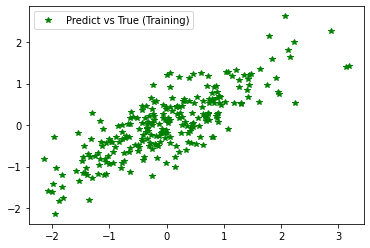

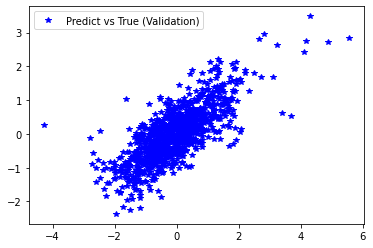

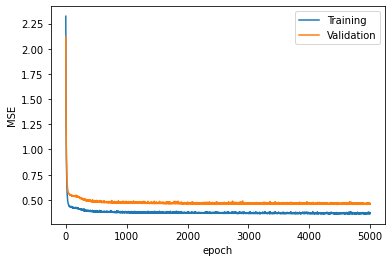

CPU times: user 1min 33s, sys: 4.56 s, total: 1min 38s
Wall time: 1min 18s


In [35]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 10
np.random.seed(seed) if seed else None

# Generate training and validation data
x_train, d_train = regr1(250, 0.4) # 250 data points with no noise
x_val, d_val = regr1(1000, 0.4)

# Here we need to normalize the target values
norm_m = d_train.mean(axis=0)
norm_s = d_train.std(axis=0)
d_train = (d_train - norm_m) / norm_s

# We use the same normalization for the validation data.
d_val = (d_val - norm_m) / norm_s


# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_train.shape[1],         
         'n_nod': [15],                      # number of nodes in hidden layer
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'linear',           # output activation function
         'opt_method': 'Adam',               # minimization method
         'cost_fun': 'mse',                 # error function
         'lr_rate': 0.01,                   # learningrate
         'lambd' : 0.1,                    # L2
         'num_out' : 1 }   # if binary --> 1 |  regression--> num output | multi-class--> num of classes

# Get the model
model = pipline(**INPUT)

# Print a summary of the model
model.summary()

# Train the model
estimator = model.fit(x_train, 
                      d_train,
                      epochs = 5000,      # Number of epochs
                      validation_data=(x_val,d_val),
                      #batch_size = x_train.shape[0],   # Batch size = all data (batch learning)
                      batch_size=125,                    # Batch size for true SGD
                      verbose = 0)

# Call the stats function to print out statistics for classification problems
pred_trn = model.predict(x_train).reshape(d_train.shape)
pred_val = model.predict(x_val).reshape(d_val.shape)
stats_reg(d_train, pred_trn, 'Training', estimator)
stats_reg(d_val, pred_val, 'Validation', estimator)

# Scatter plots of predicted and true values
plt.figure()
plt.plot(d_train, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()

# Plot the learning curves
plt.figure()
plt.plot(estimator.history['loss'], label='Training')
plt.plot(estimator.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend()
plt.show()


### CellName: Ex4 (#11)
### CellType: Exercise
### Cell instruction: Instruction for question 10

For this exercise you are given a classification problem with a fixed training-, validation- and test dataset. The data is the Japanse vowels dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We do not provide any python code for this question, only the small part that reads the data (next code cell). There is an additional code cell that can be used to print the confusion matrix for the test data (see comments within that cell). (You can modify this function if you want to compute this matrix for both training and validation.)

#### Question 10
**Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.**

**Hint 1:** 
Remember to check if input data needs to be normalized. See the "Ex3" cell how this was done (in that case for the target data).

**Hint 2:** 
This problem is a 9-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

**Hint 3:**
The function *stats_class* function does not work here since it is designed for binary classification problems.


train input size:  (4274, 12) train target size:  (4274, 9)
val   input size:  (2275, 12) val   target size:  (2275, 9)
test  input size:  (3412, 12) test  target size:  (3412, 9)
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 12)]              0         
_________________________________________________________________
dense_52 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_53 (Dense)             (None, 9)                 81        
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


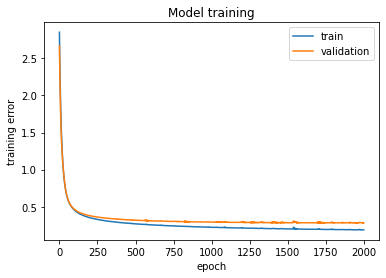


 ########## Result for Test Data ########## 

log_loss:    0.24649295227450652
accuracy:    0.9229191090269636 

              precision    recall  f1-score   support

     class 1       0.94      0.96      0.95       303
     class 2       0.86      0.84      0.85       322
     class 3       0.94      0.94      0.94       708
     class 4       0.95      0.92      0.93       528
     class 5       0.93      0.94      0.93       247
     class 6       0.97      1.00      0.98       265
     class 7       0.96      0.96      0.96       400
     class 8       0.85      0.85      0.85       384
     class 9       0.88      0.89      0.89       255

    accuracy                           0.92      3412
   macro avg       0.92      0.92      0.92      3412
weighted avg       0.92      0.92      0.92      3412



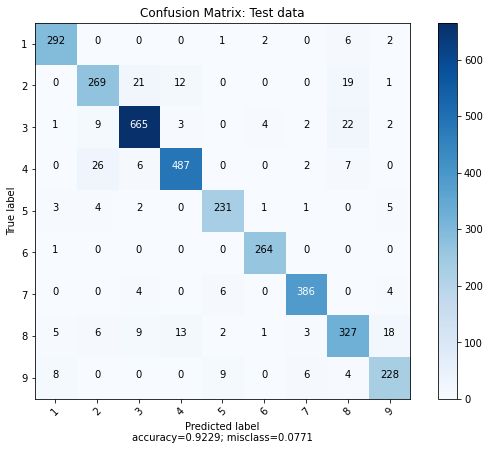

CPU times: user 38.1 s, sys: 1.33 s, total: 39.4 s
Wall time: 32.8 s


In [29]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

x_train, y_train, x_val, y_val, x_test, y_test = vowels()
num_classes = 9

print('train input size: ',x_train.shape, 'train target size: ',y_train.shape)
print('val   input size: ',x_val.shape, 'val   target size: ',y_val.shape)
print('test  input size: ',x_test.shape, 'test  target size: ',y_test.shape)

norm_m = x_train.mean(axis=0)
norm_s = x_train.std(axis=0)
x_train = (x_train - norm_m) / norm_s
x_val = (x_val - norm_m) / norm_s
x_test = (x_test - norm_m) / norm_s



INPUT = {'inp_dim': x_train.shape[1],         
         'n_nod': [8],                      # number of nodes in hidden layer
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'softmax',          # output activation function
         'opt_method': 'Adam',               # minimization method
         'cost_fun': 'categorical_crossentropy', # error function
         'lr_rate': 0.025 ,                    # learningrate
         'lambd' : 0.02,                    # L2
         'num_out' : y_train.shape[1] }              # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_vowels = pipline(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator = model_vowels.fit(x_train, y_train,
                      epochs = 2000,      
                      validation_data=(x_val, y_val),
                      batch_size = x_train.shape[0],    # Batch size = all data (batch learning)
                      #batch_size=2000,                   # Batch size for true SGD
                      verbose = 0)

# Plot the learning curves
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('Model training')
plt.ylabel('training error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=0)
plt.show()


print('\n','#'*10,'Result for {} Data'.format('Test'), '#'*10, '\n')

y_pred = model_vowels.predict(x_test, verbose=0 )
print('log_loss:   ', log_loss(y_test, y_pred, eps=1e-15))

y_true = y_test.argmax(axis=1)
y_pred = y_pred.argmax(axis=1)
print('accuracy:   ',(y_pred==y_true).mean(), '\n')

target_names = ['class {}'.format(i+1) for i in range(9)]
print(classification_report(y_true, y_pred, target_names=target_names))

confuTst = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = confuTst, 
                      normalize    = False,
                      target_names = ['1', '2', '3', '4', '5', '6','7', '8','9'],
                      title        = "Confusion Matrix: Test data")



# Define the network, cost function and minimization method,
# train and evaluate the result



 ########## Result for Test Data ########## 

log_loss:    0.2678349426901402
accuracy:    0.9158851113716295 

              precision    recall  f1-score   support

     class 1       0.94      0.98      0.96       303
     class 2       0.83      0.82      0.83       322
     class 3       0.94      0.93      0.93       708
     class 4       0.94      0.91      0.92       528
     class 5       0.95      0.93      0.94       247
     class 6       0.96      0.99      0.97       265
     class 7       0.98      0.96      0.97       400
     class 8       0.82      0.83      0.83       384
     class 9       0.87      0.91      0.89       255

    accuracy                           0.92      3412
   macro avg       0.91      0.92      0.91      3412
weighted avg       0.92      0.92      0.92      3412



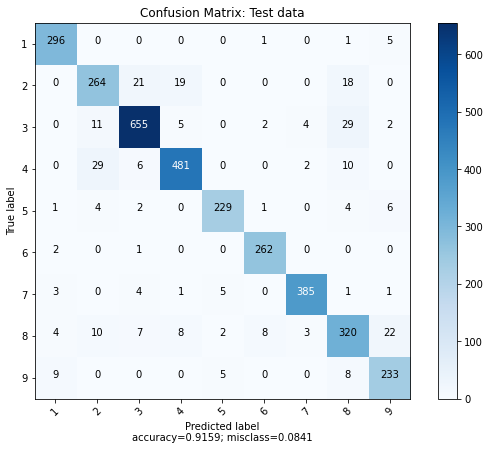

In [19]:
"""
This cell can be used to present the classification results. 
It assumes you trained model has the name 'model_vowels'. 
It shows the test data results, but it can be changed to show
the training/validation.
"""
print('\n','#'*10,'Result for {} Data'.format('Test'), '#'*10, '\n')

y_pred = model_vowels.predict(x_test, verbose=0 )
print('log_loss:   ', log_loss(y_test, y_pred, eps=1e-15))

y_true = y_test.argmax(axis=1)
y_pred = y_pred.argmax(axis=1)
print('accuracy:   ',(y_pred==y_true).mean(), '\n')

target_names = ['class {}'.format(i+1) for i in range(9)]
print(classification_report(y_true, y_pred, target_names=target_names))

confuTst = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = confuTst, 
                      normalize    = False,
                      target_names = ['1', '2', '3', '4', '5', '6','7', '8','9'],
                      title        = "Confusion Matrix: Test data")



### CellName: Ex5 (#12)
### CellType: Exercise
### Cell instruction: Instruction for question 11

For this last exercise the task is to train a binary classifier for the spiral problem. The aim is to get *zero* classification error for the training data (there is no test data) with as small as possible model, in terms of the number of trainable weights. Also plot the boundary to see if it resembles a spriral. To pass this question you should at least try!

#### Question 11
**Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model.**

Model: "model_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_264 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_265 (Dense)            (None, 6)                 66        
_________________________________________________________________
dense_266 (Dense)            (None, 4)                 28        
_________________________________________________________________
dense_267 (Dense)            (None, 1)                 5         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________

 ########## STATISTICS for Training Data ########## 

Accuracy   0.9742268041237113
Sensitivity   1.0
Specificity   0.9484536

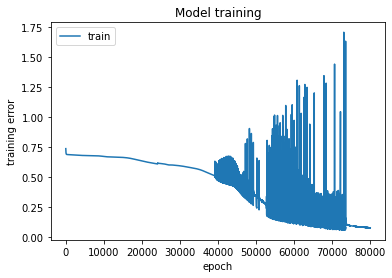

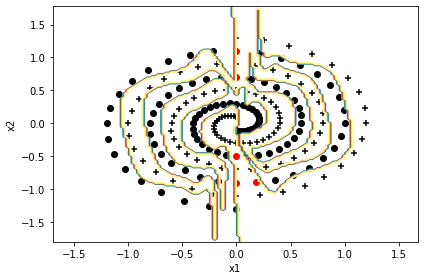

In [91]:
# seed = 0 means random, seed > 0 means fixed
seed = 1
np.random.seed(seed) if seed else None
    
# Generate training data
x_train, d_train = spiral()
x_train = x_train / 5

INPUT = {'inp_dim': x_train.shape[1],         
         'n_nod': [10,6,4],                      # number of nodes in hidden layer
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'SGD',               # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.04,                    # learningrate

         'num_out' : 1 }              # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model = pipline(**INPUT)

# Print a summary of the model
model.summary()

# Train the model
estimator = model.fit(x_train, d_train,
                      epochs = 80000,      
                      batch_size = x_train.shape[0],    # Batch size = all data (batch learning)
                      #batch_size=75,                   # Batch size for true SGD
                      verbose = 0)

# Call the stats function to print out statistics for classification problems
stats_class(x_train, d_train, 'Training', model)

# Plot the learning curves
plt.plot(estimator.history['loss'])
plt.title('Model training')
plt.ylabel('training error')
plt.xlabel('epoch')
plt.legend(['train'], loc=0)
plt.show()

# Show the decision boundary for the training dataset
decision_b(x_train, d_train)


# Define the network, cost function and minimization method,
# train and evaluate the result


# The report!


### Name 
    Andreas Häggström
    
### Introduction
    This is the first laboration of the course Deep Learning, in this lab I've gotten the chance to learn a lot about Multi Layer Perceptrons. This includes how to construct an MLP within Tensorflow/Keras and then how to customize the network for certain problems. This report contains the answers to the questions that were asked during the exercises and finally a summary of the laboration as a whole.

### Answers to questions

#### Q1) Why can you solve this problem with a single hidden node?
    This is since the data of the syn1 is lineary seperable, one can draw a single line to completely separate the two classes of data. A single node node an perform linear separation and the model can therefore handle this problem with only one node.

#### Q2) What is the performance you get on the validation dataset?
    I get an accuracy of 0.874 and a loss value of 0.291. This is an fairly okay value and is what I expected from this model. The data of syn2 is for the most part lineary seperable but there are som data points from ther different classes which overlap. Therefore a simple linear separator isn't enough for this data. 

#### Q3) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?
    I used Adam as the minimization function, a learning rate of 0.1, 10 000 epochs and a batch size of 25. With this I needed 8 nodes to achieve 95% accuracy for the test set. It seems like this problem need more pre-processing for one to be able to achieve a reasonable accuacy for the test and validation set. Something like a kernel function to distinguish the data points that are overlapped.
#### Q4) 
* **(a) When you overtrained in the previous question, how much much did the validation *loss* increase, compared to the linear model of Q2?**
    * My validation loss increased from 0.291 in Q2 to 1.93, this model is terrible at  handling data that it hasn't seen. This is because the model has been formed too much to fit the exact training data, meaning that it is very overtrained. 

* **(b) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?**
    * I couldn't get it to perform better than with 1 node. I think it's because the problem is tending towards being lineary seperable but not quite. Maby some preprocessing could increase the performance as said in a)

#### Q5) How many hidden nodes do you need to find a reasonable solution to the problem?  Extra: Can you figure out why this many?
    The best result i achieved was an accuacy of 0.846 with 3 hidden nodes. The reason for the need of 3 hidden node is probably since the model has to adjust a circular curve to distinguish the different data types.

#### Q6) Even though the validation error is most likely still larger than the training error why do we not see any overtraining of the model? (Hint: What is it that typically causes overfitting?)
    This is probably since the training and the validation data has a similiar distribution and that there are 6 input fields. This seems to give the model a fairly good ability to exterpolate. At about 10 nodes the model starts to overfit though. The reason for this is probably that the model starts to over-adjust for outliers within the training data. When I increased the amount of training data points, I also could increase the amount of nodes in the network which strengthens this theory since it would decrease the importance of the outliers.
#### Q7) How many nodes do you have for opitimal validation performance, i.e. more hidden nodes results in overtraining?
    I got the optimal result with 3 nodes, above that the model started to overfit to the noise and the result got worse. 
    
#### Q8) Give the L2 value that you found to give "optimal" validation performance and compare with the result from  question 7 (optimal performance).
    I got the result with a MSE at 0.462 and Correlation of 0.764 when the regularization parameter was at 0.1 . This is similar to the result of Q7 but it shows that the regularization parameter allows the network to be larger but still be stable and avoid overfitting. 

#### Q9) Summarize your findings in a few sentences.
    This excersice taught me the importance and the effect of the regularization parameter in practice. It allows networks to be bigger but still be stable and avoid overfitting. I also learned the importance of a good learning rate and how the amount of nodes can drastically affect the end result. Finally I learned that the batch size is also important to get a good result for your model.

#### Q10) Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.

The model I created was a single-layer model with 8 hidden nodes, I had the following parameters: 
 * 'act_fun': 'tanh',                 # activation functions for the hidden layer
 * 'out_act_fun': 'softmax',          # output activation function
 * 'opt_method': 'Adam',               # minimization method
 * 'cost_fun': 'categorical_crossentropy', # error function
 * 'lr_rate': 0.025 ,                    # learningrate
 * 'lambd' : 0.02,     
With this I got a result of 0.92 in accuracy and a log loss of 0.246. This is a sufficient result according to me, I also tried with several layers but didn't get any better result. Instead I got the same result as with a single layer and therefore decided that simplicity was better and chose the single layer model.

#### Q11) Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model.
I got the best result with the structure [10,6,4] and that got me a result of 0.974 in accuracy and a loss of 0.076. Here I used the following parameters: 
   
 * 'n_nod': [10,6,4],                      # number of nodes in hidden layer
 * 'act_fun': 'tanh',                 # activation functions for the hidden layer
 * 'out_act_fun': 'sigmoid',          # output activation function
 * 'opt_method': 'SGD',               # minimization method
 * 'cost_fun': 'binary_crossentropy', # error function
 * 'lr_rate': 0.04,                    # learningrate
 
I couldn't get the model to perform well at all when using a regularization parameter. Even with a L2 value of 0.001 the model wouldn't adapt to the curvature of the data very well. In the previous exercises, regularization mostly improved the model by adding stability but this excersice showed me why one sometimes shoudln't use a regularization parameter. The reason for using such a small learning rate was that I instead of using the regularization parameter chose to have a small learning rate together with a high amount of epochs. This to still maintain the stability of the model.

### Summary

I enjoyed this laboration since it covered several parts of the the MLP field. I got a better understanding of how the structure of the NN affects the models' ability to adapt to data and a some insight into making decisions of model construction. The main giveaway for me from this laboration is from the two last tasks, first that I successfully got the same result with a single layer network as with a multi layer (probably since the second layer did the same thing as the first or didnt do anything at all really). The I learned the effects of regularization, how and why one wants to use it and when one wouldn't want to use it (last task).
  